In [1]:
import sys; sys.path.insert(0, '..')
from database.dataset import INBreast_Dataset
import matplotlib.pyplot as plt
from metrics import get_tp_fp_fn
from tqdm import tqdm
import numpy as np
import h5py

In [2]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='image',
        extract_patches=False,
        normalize=None,
        n_jobs=-1,
        partitions=['train']
    )

In [3]:
# import h5py
path = '/home/jseia/Desktop/ml-dl/data/hdog_detections/det_ms-1.18_sr-1.05_Ms-3.1_m-marasinou_dth-0.006_hdiv-200.0_hth-1.14.hdf5'
with h5py.File(path, 'r') as f:
    detections = f[f'{db.df.at[0, "img_id"]}/hessian_detections'][:]

In [5]:
case = db[0]
tp, fp, fn, gt_predicted, close_fp = get_tp_fp_fn(
    case['lesion_bboxes'], case['radiuses'], detections, 10, 0.8, True, case['lesion_mask']
)
len(tp), len(fp), len(fn), len(gt_predicted), len(close_fp)

(29, 554944, 26, 11, 770)

In [6]:
case = db[0]
tp, fp, fn, gt_predicted, close_fp = get_tp_fp_fn(
    case['lesion_bboxes'], case['radiuses'], detections, 10, 0.8
)
len(tp), len(fp), len(fn), len(gt_predicted), len(close_fp)

(29, 554944, 26, 11, 741)

In [31]:
def plot_blobs(image,image_blobs, tp, color):
    f,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(image,cmap='gray')
    for blob in tqdm(image_blobs):
        y,x,r = blob
        c = plt.Circle((x, y), r+8, color='red', linewidth=1, fill=False)
        ax.add_patch(c)
    for blob in tqdm(tp):
        y,x,r = blob
        c = plt.Circle((x, y), r+6, color='yellow', linewidth=1, fill=False)
        ax.add_patch(c)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

100%|██████████| 66/66 [00:00<00:00, 2118.61it/s]


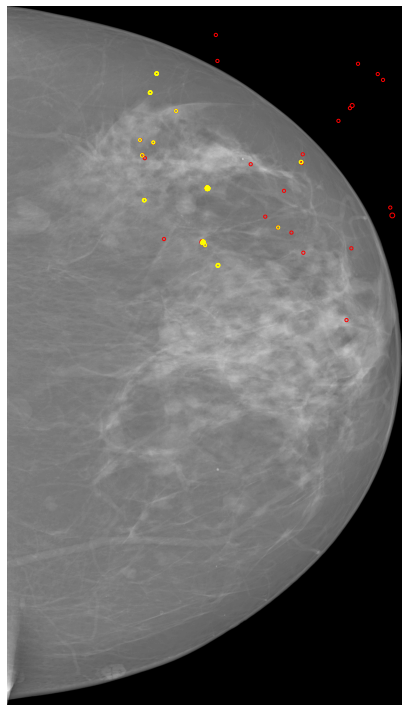

In [32]:
lesion_bboxes = case['lesion_bboxes']
radiouses = case['radiuses']
radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(lesion_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

plot_blobs(db[0]['img'], gt_circles, tp, 'red')